# Figure 3 sketch 

Figure about model evidence and AIC for model comparison

### Load required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle
from scipy.io import loadmat
import seaborn as sns
import matplotlib.ticker
import matplotlib.gridspec as gridspec

from multiprocessing import Pool
import multiprocessing as mp

# Functions with Models compyled with Cython
# import Model1_Cython as M1
# import Model2_Cython as M2
# import Model3_Cython as M3

# Function to simulate the 3 models for all parameter draws (needed in separate file for multiprocessesing in windows)
#import SolveALLCyGen as SAC

# Bhattacharyya Distance Function 
#import BhattacharyyaDistanceV1 as BD

### Load model comparison results

Bayesian

In [2]:
lnEvidenceReorg= pd.read_csv('Multi_lnModelEvidence_Reorganised.csv', delimiter=",")
lnEvidenceReorg['LogEvidence'] = lnEvidenceReorg['lnEvidence']/2.303
lnEvidenceReorg['LogEvidenceNormFactor'] = lnEvidenceReorg['LogEvidence'][0:10]
lnEvidenceReorg['LogEvidenceNormFactor'][10:20] = lnEvidenceReorg['LogEvidence'][0:10]
lnEvidenceReorg['LogEvidenceNormFactor'][20:30] = lnEvidenceReorg['LogEvidence'][0:10]
#lnEvidenceReorg['LogEvidenceNormFactor'][0:10] = lnEvidenceReorg['LogEvidence'][0:10]
lnEvidenceReorg['LogEvidenceNorm'] = lnEvidenceReorg['LogEvidenceNormFactor']-lnEvidenceReorg['LogEvidence']

<ipython-input-2-8f5b8eb14f89>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lnEvidenceReorg['LogEvidenceNormFactor'][10:20] = lnEvidenceReorg['LogEvidence'][0:10]
<ipython-input-2-8f5b8eb14f89>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lnEvidenceReorg['LogEvidenceNormFactor'][20:30] = lnEvidenceReorg['LogEvidence'][0:10]


Frequentist

In [3]:
# Extract results from mat files
pM1f = loadmat("AMIGOStatsModel1.mat")
strut = pM1f['statsM1']['AkaikeInformationCrit'][0][0:10]
AICM1 = np.zeros(10)
for i in range(0,10):
    AICM1[i] = strut[i][0][0][0][0][0]
    
pM2f = loadmat("AMIGOStatsModel2.mat")
strut = pM2f['statsM2']['AkaikeInformationCrit'][0][0:10]
AICM2 = np.zeros(10)
for i in range(0,10):
    AICM2[i] = strut[i][0][0][0][0][0]
    
pM3f = loadmat("AMIGOStatsModel3.mat")
strut = pM3f['statsM3']['AkaikeInformationCrit'][0][0:10]
AICM3 = np.zeros(10)
for i in range(0,10):
    AICM3[i] = strut[i][0][0][0][0][0]

In [4]:
# Construct data frame with results
AICFrec = pd.DataFrame({'Model' : [], 'ExpName': [], 'AIC': [], 'logAIC': [], 'normAIC': [], 'normLogAIC': []})
AICFrec['Model'] = lnEvidenceReorg['Model']
AICFrec['ExpName'] = lnEvidenceReorg['ExpName']
AICFrec['AIC'][0:10] = AICM1
AICFrec['AIC'][10:20] = AICM2
AICFrec['AIC'][20:30] = AICM3
AICFrec['logAIC'] = np.log(AICFrec['AIC'])
for i in range(0,10):
    AICFrec['normAIC'][i] = AICFrec['AIC'][i]/AICFrec['AIC'][i]
    AICFrec['normAIC'][i+10] = AICFrec['AIC'][i+10]/AICFrec['AIC'][i]
    AICFrec['normAIC'][i+20] = AICFrec['AIC'][i+20]/AICFrec['AIC'][i]
    
for i in range(0,10):
    AICFrec['normLogAIC'][i] = AICFrec['logAIC'][i]-AICFrec['logAIC'][i]
    AICFrec['normLogAIC'][i+10] = AICFrec['logAIC'][i+10]-AICFrec['logAIC'][i]
    AICFrec['normLogAIC'][i+20] = AICFrec['logAIC'][i+20]-AICFrec['logAIC'][i]
    

<ipython-input-4-3b559362d7d3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AICFrec['AIC'][0:10] = AICM1
<ipython-input-4-3b559362d7d3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AICFrec['AIC'][10:20] = AICM2
<ipython-input-4-3b559362d7d3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AICFrec['AIC'][20:30] = AICM3
<ipython-input-4-3b559362d7d3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

## Plot

#### Version 1 (AIC)

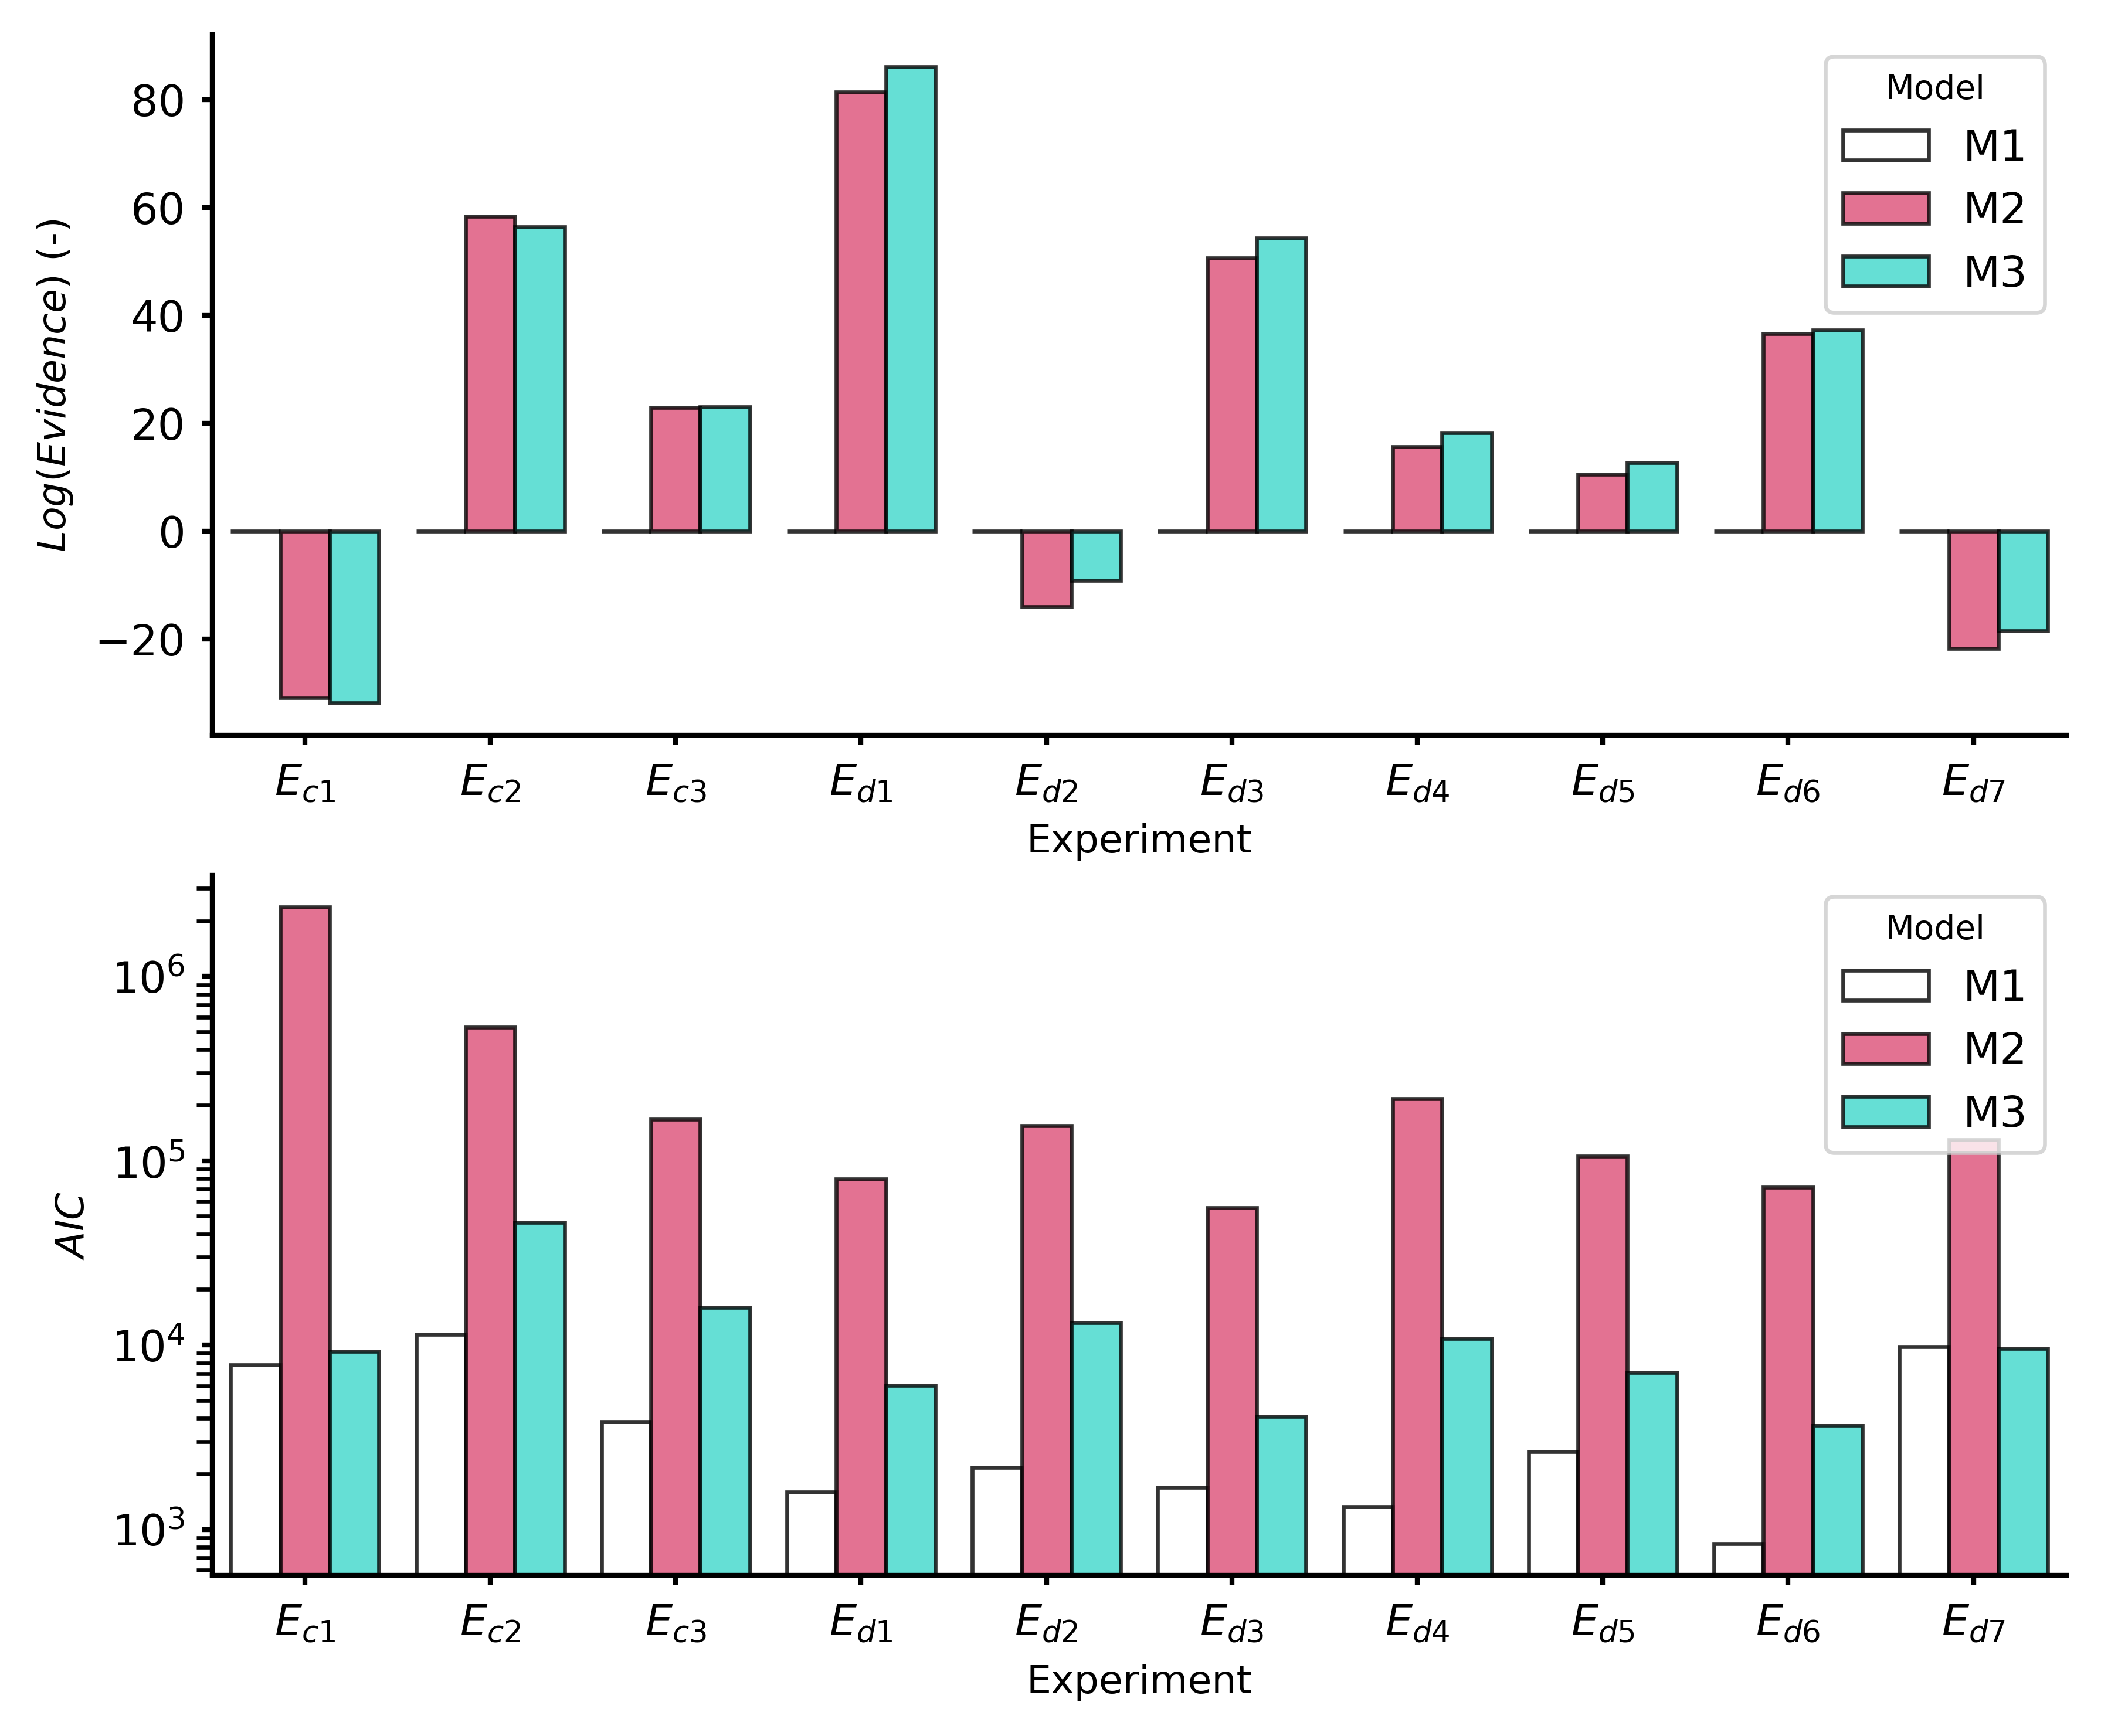

In [5]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(6.8, 5.8), dpi = 600)
sns.set_context("paper", rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":8,"axes.tickslabelssize":8,"text.usetex" : True,"text.latex.unicode" : True})  
#pal = dict(alpha1='#fff7f3', Vm1 = '#fde0dd',h1 = '#fcc5c0', Km1 = '#fa9fb5', d1 ='#f768a1' , alpha2 = '#dd3497', d2 ='#ae017e' ,Kf='#7a0177' )



gs = gridspec.GridSpec(2, 3)
#------> Barplot total model evidence
pal1 = dict(M1='#ffffff',M2 = '#f4376d',M3 = '#25f0e0')
#dict(S='#5e3c99', P = '#b2abd2',R = '#fdb863', O = '#fcbba1')#8dd3c7
#ffffb3

#------> Barplot total model evidence

ax1 = plt.subplot(gs[0, 0::])
ax1 = sns.barplot(data = lnEvidenceReorg,x='ExpName', y='LogEvidenceNorm', hue = 'Model',palette = pal1,edgecolor = 'black',errwidth = 0.8,alpha=.8)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(length=2)
ax1.set_xticklabels((r'$E_{c1}$',r'$E_{c2}$',r'$E_{c3}$',r'$E_{d1}$',r'$E_{d2}$',r'$E_{d3}$',r'$E_{d4}$',r'$E_{d5}$',r'$E_{d6}$',r'$E_{d7}$'))
ax1.set_xlabel('Experiment')
ax1.set_ylabel(r'$Log(Evidence)$ (-)',rotation = 90)

#------> Barplot total AIC
ax2 = plt.subplot(gs[1, 0::])

ax2 = sns.barplot(data = AICFrec,x='ExpName', y='AIC', hue = 'Model',palette = pal1,edgecolor = 'black',errwidth = 0.8,alpha=.8)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.tick_params(length=2)
ax2.set_xticklabels((r'$E_{c1}$',r'$E_{c2}$',r'$E_{c3}$',r'$E_{d1}$',r'$E_{d2}$',r'$E_{d3}$',r'$E_{d4}$',r'$E_{d5}$',r'$E_{d6}$',r'$E_{d7}$'))
ax2.set_xlabel('Experiment')
ax2.set_ylabel(r'$AIC$ ',rotation = 90)
ax2.set_yscale('log')
plt.show()

#### Version 2 (Log AIC)

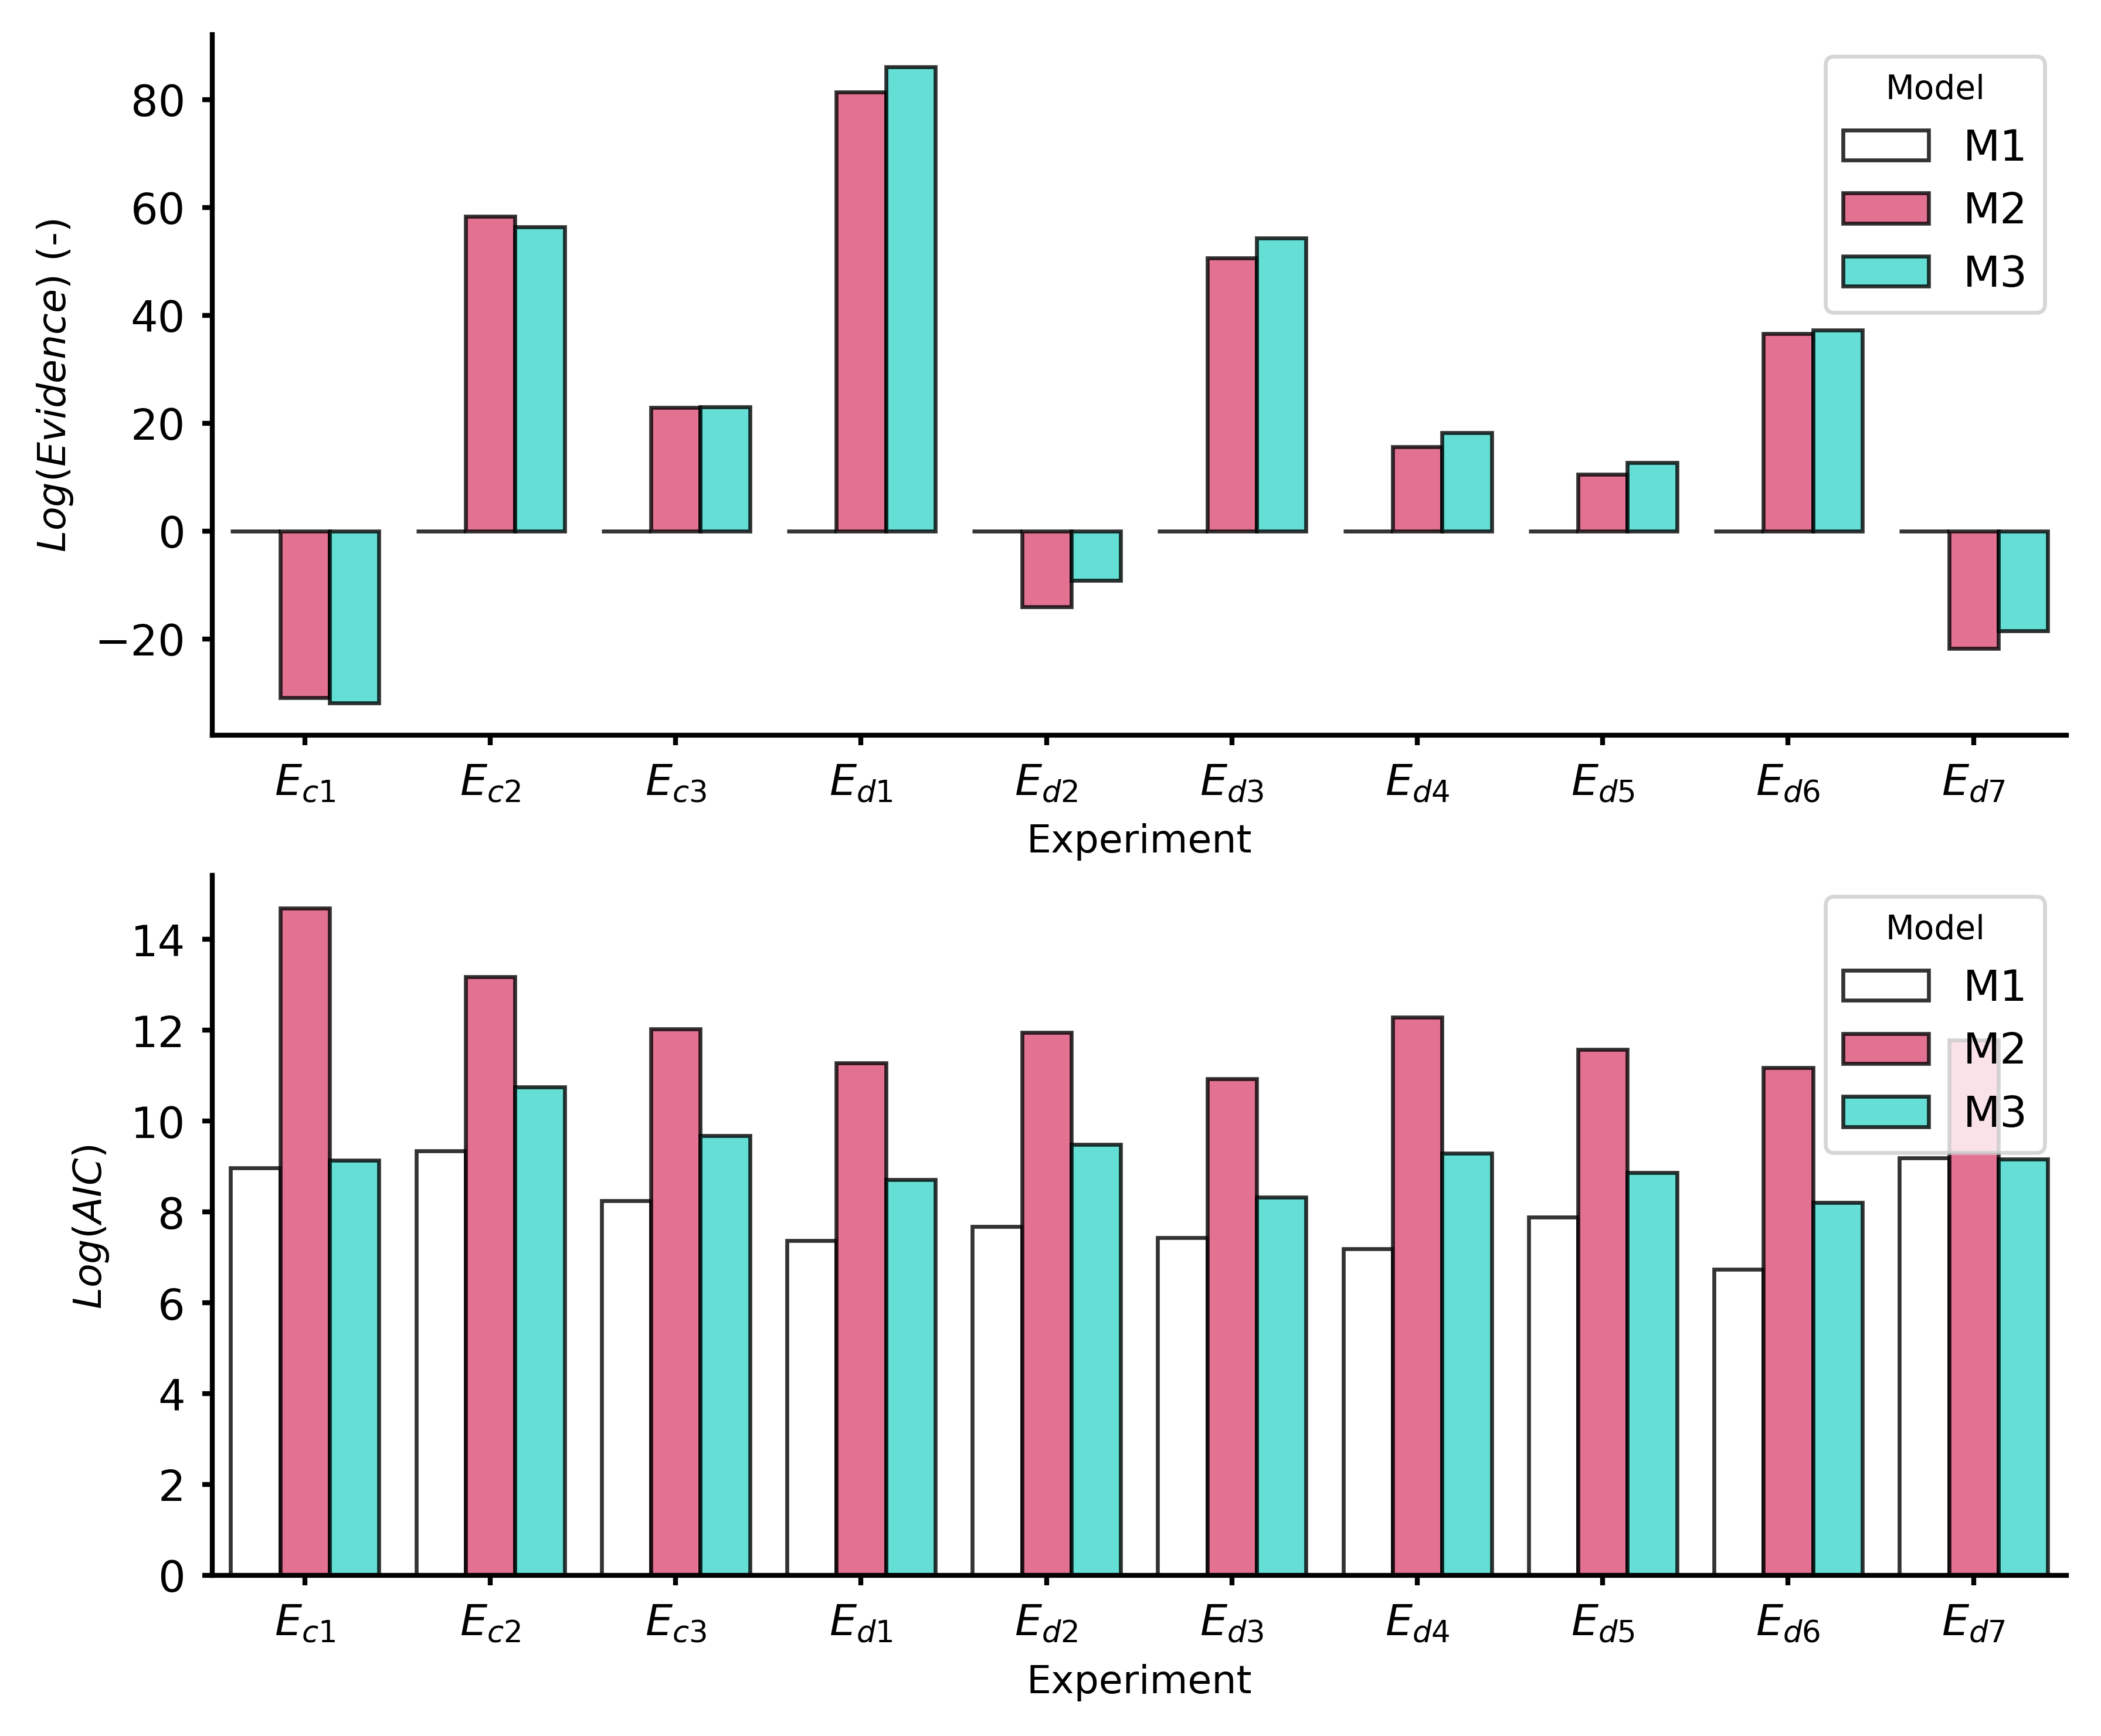

In [6]:
fig = plt.figure(figsize=(6.8, 5.8), dpi = 600)
sns.set_context("paper", rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":8,"axes.tickslabelssize":8,"text.usetex" : True,"text.latex.unicode" : True})  
#pal = dict(alpha1='#fff7f3', Vm1 = '#fde0dd',h1 = '#fcc5c0', Km1 = '#fa9fb5', d1 ='#f768a1' , alpha2 = '#dd3497', d2 ='#ae017e' ,Kf='#7a0177' )



gs = gridspec.GridSpec(2, 3)
#------> Barplot total model evidence
pal1 = dict(M1='#ffffff',M2 = '#f4376d',M3 = '#25f0e0')
#dict(S='#5e3c99', P = '#b2abd2',R = '#fdb863', O = '#fcbba1')#8dd3c7
#ffffb3

#------> Barplot total model evidence

ax1 = plt.subplot(gs[0, 0::])
ax1 = sns.barplot(data = lnEvidenceReorg,x='ExpName', y='LogEvidenceNorm', hue = 'Model',palette = pal1,edgecolor = 'black',errwidth = 0.8,alpha=.8)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(length=2)
ax1.set_xticklabels((r'$E_{c1}$',r'$E_{c2}$',r'$E_{c3}$',r'$E_{d1}$',r'$E_{d2}$',r'$E_{d3}$',r'$E_{d4}$',r'$E_{d5}$',r'$E_{d6}$',r'$E_{d7}$'))
ax1.set_xlabel('Experiment')
ax1.set_ylabel(r'$Log(Evidence)$ (-)',rotation = 90)

#------> Barplot total AIC
ax2 = plt.subplot(gs[1, 0::])

ax2 = sns.barplot(data = AICFrec,x='ExpName', y='logAIC', hue = 'Model',palette = pal1,edgecolor = 'black',errwidth = 0.8,alpha=.8)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.tick_params(length=2)
ax2.set_xticklabels((r'$E_{c1}$',r'$E_{c2}$',r'$E_{c3}$',r'$E_{d1}$',r'$E_{d2}$',r'$E_{d3}$',r'$E_{d4}$',r'$E_{d5}$',r'$E_{d6}$',r'$E_{d7}$'))
ax2.set_xlabel('Experiment')
ax2.set_ylabel(r'$Log(AIC)$ ',rotation = 90)
plt.show()
#fig.savefig('/Users/lucia/Dropbox/Processes_V2.0_Images/InkscapeImages/Evidence.svg')


#### Version 3 (Normalised AIC)

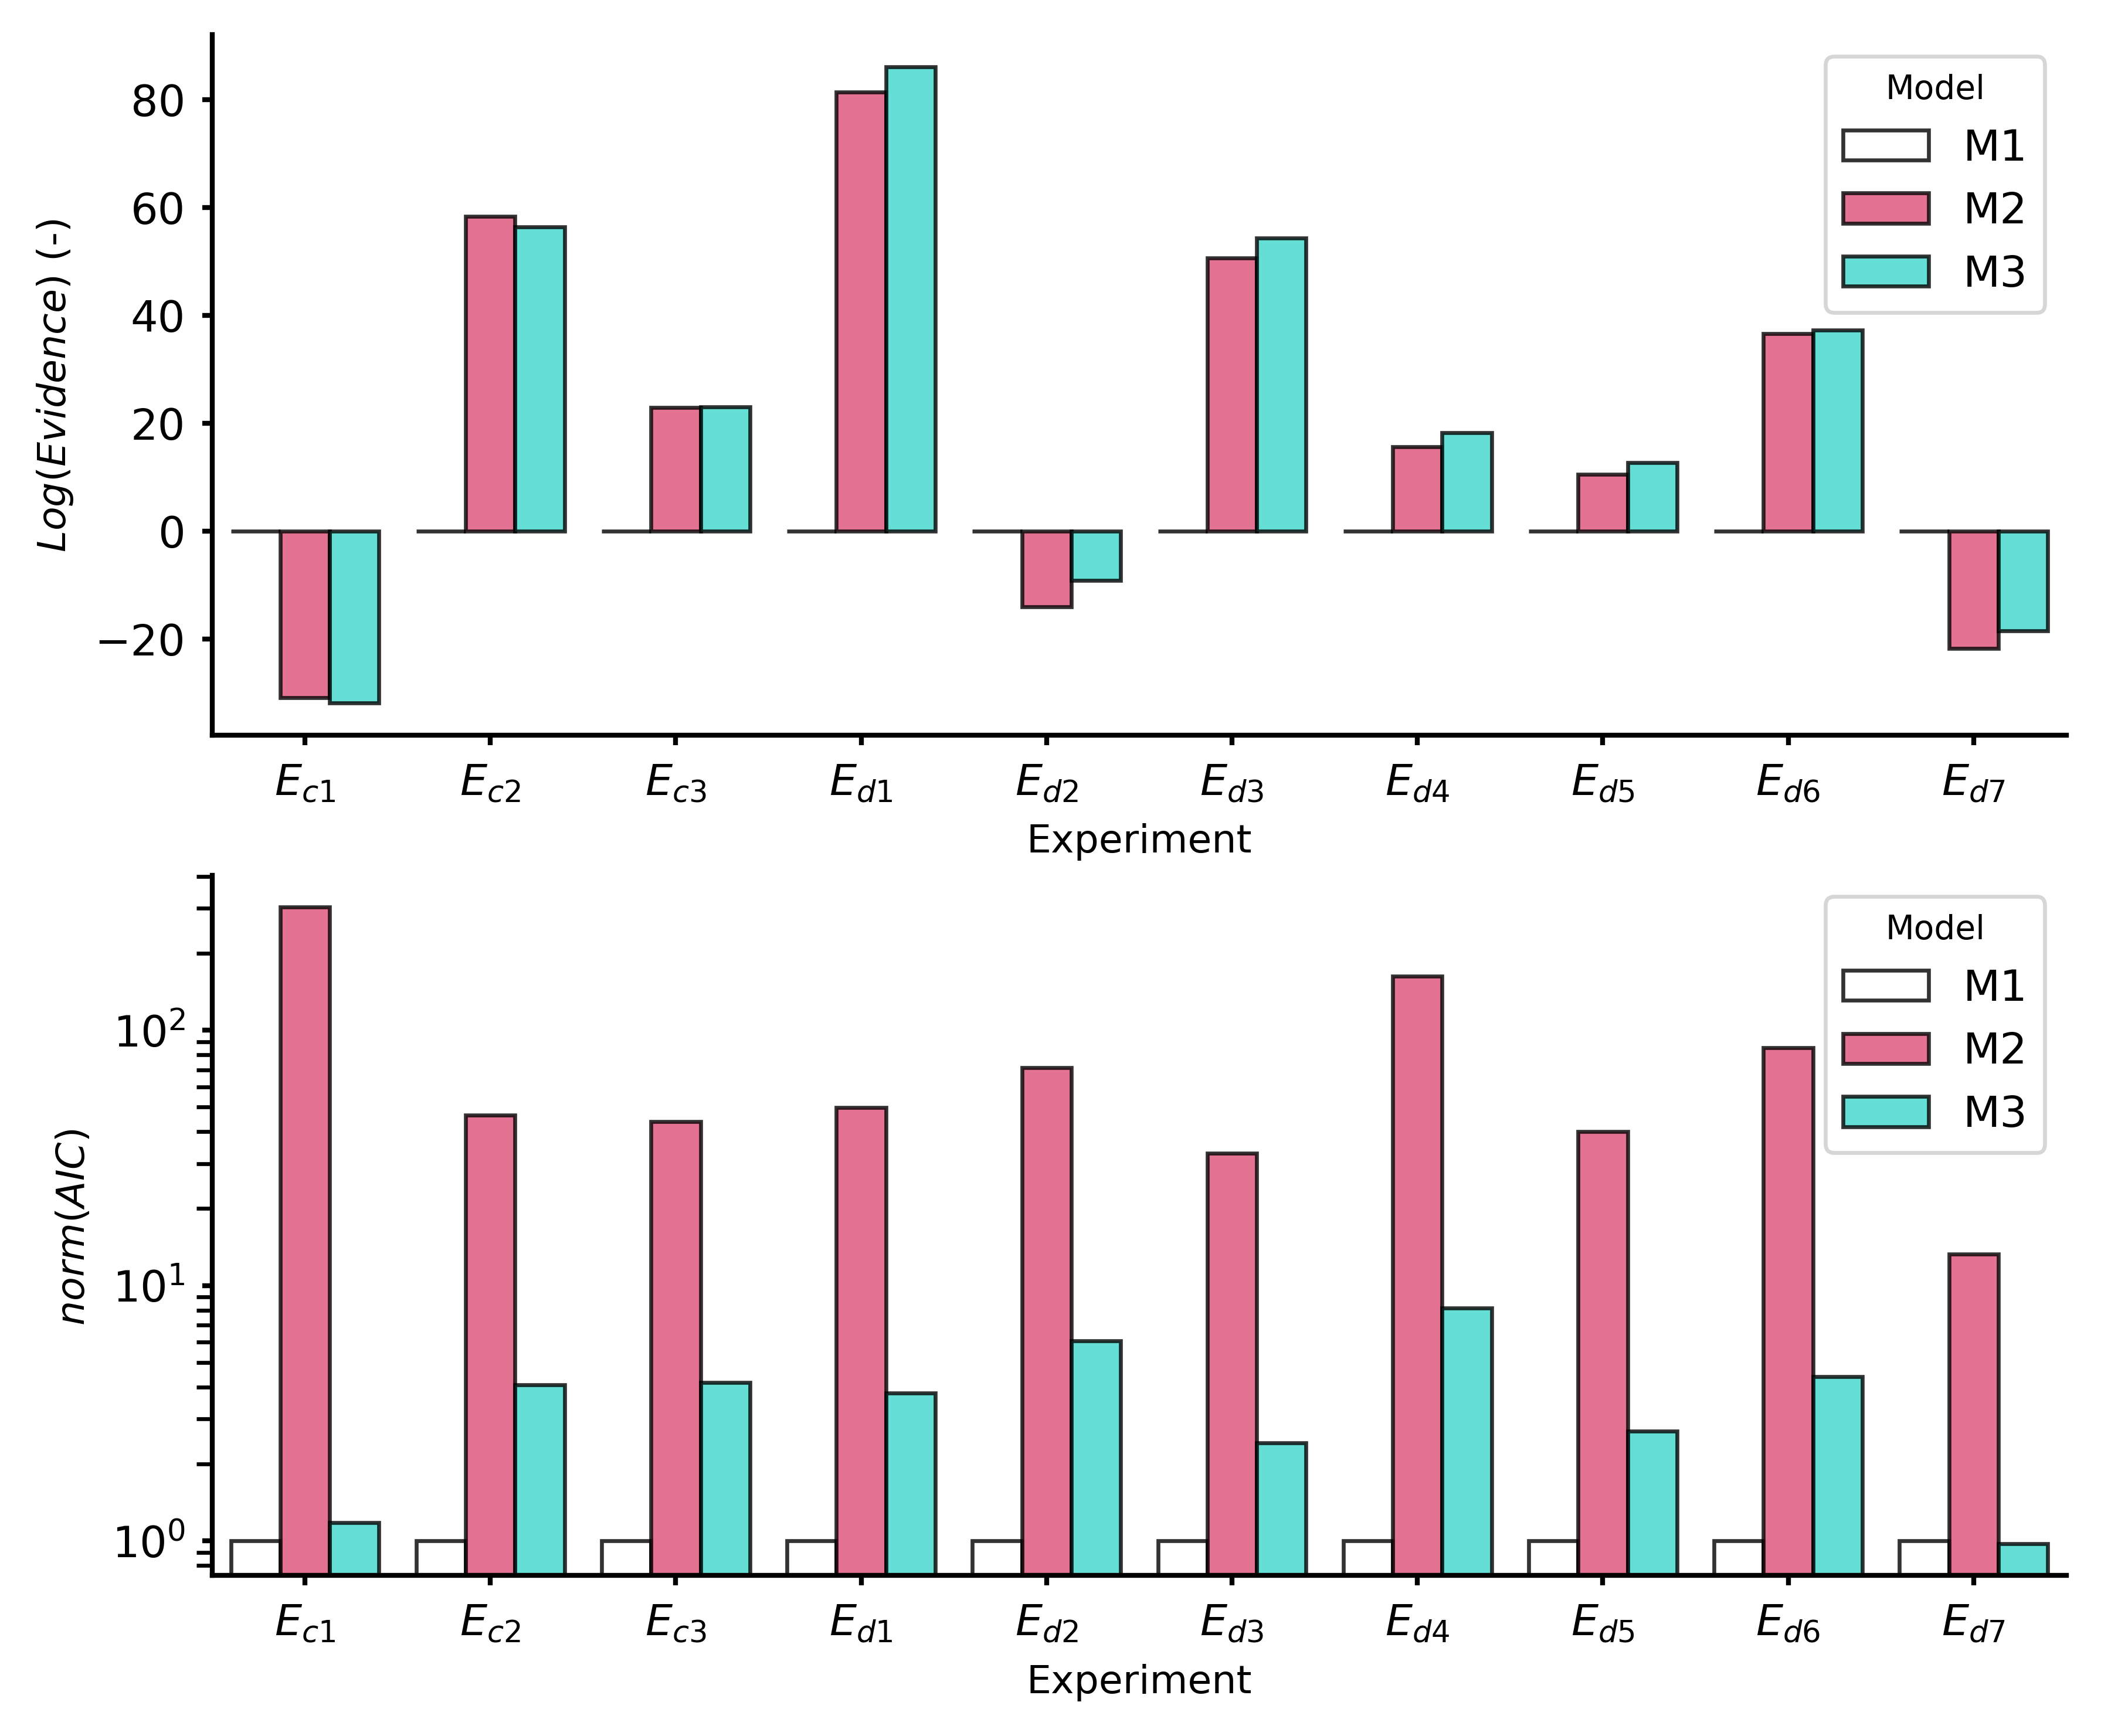

In [81]:
fig = plt.figure(figsize=(6.8, 5.8), dpi = 600)
sns.set_context("paper", rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":8,"axes.tickslabelssize":8,"text.usetex" : True,"text.latex.unicode" : True})  
#pal = dict(alpha1='#fff7f3', Vm1 = '#fde0dd',h1 = '#fcc5c0', Km1 = '#fa9fb5', d1 ='#f768a1' , alpha2 = '#dd3497', d2 ='#ae017e' ,Kf='#7a0177' )



gs = gridspec.GridSpec(2, 3)
#------> Barplot total model evidence
pal1 = dict(M1='#ffffff',M2 = '#f4376d',M3 = '#25f0e0')
#dict(S='#5e3c99', P = '#b2abd2',R = '#fdb863', O = '#fcbba1')#8dd3c7
#ffffb3

#------> Barplot total model evidence

ax1 = plt.subplot(gs[0, 0::])
ax1 = sns.barplot(data = lnEvidenceReorg,x='ExpName', y='LogEvidenceNorm', hue = 'Model',palette = pal1,edgecolor = 'black',errwidth = 0.8,alpha=.8)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(length=2)
ax1.set_xticklabels((r'$E_{c1}$',r'$E_{c2}$',r'$E_{c3}$',r'$E_{d1}$',r'$E_{d2}$',r'$E_{d3}$',r'$E_{d4}$',r'$E_{d5}$',r'$E_{d6}$',r'$E_{d7}$'))
ax1.set_xlabel('Experiment')
ax1.set_ylabel(r'$Log(Evidence)$ (-)',rotation = 90)

#------> Barplot total AIC
ax2 = plt.subplot(gs[1, 0::])

ax2 = sns.barplot(data = AICFrec,x='ExpName', y='normAIC', hue = 'Model',palette = pal1,edgecolor = 'black',errwidth = 0.8,alpha=.8)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.tick_params(length=2)
ax2.set_xticklabels((r'$E_{c1}$',r'$E_{c2}$',r'$E_{c3}$',r'$E_{d1}$',r'$E_{d2}$',r'$E_{d3}$',r'$E_{d4}$',r'$E_{d5}$',r'$E_{d6}$',r'$E_{d7}$'))
ax2.set_xlabel('Experiment')
ax2.set_ylabel(r'$norm(AIC)$ ',rotation = 90)
ax2.set_yscale('log')
plt.show()

#### Version 4 (Normalised log AIC)

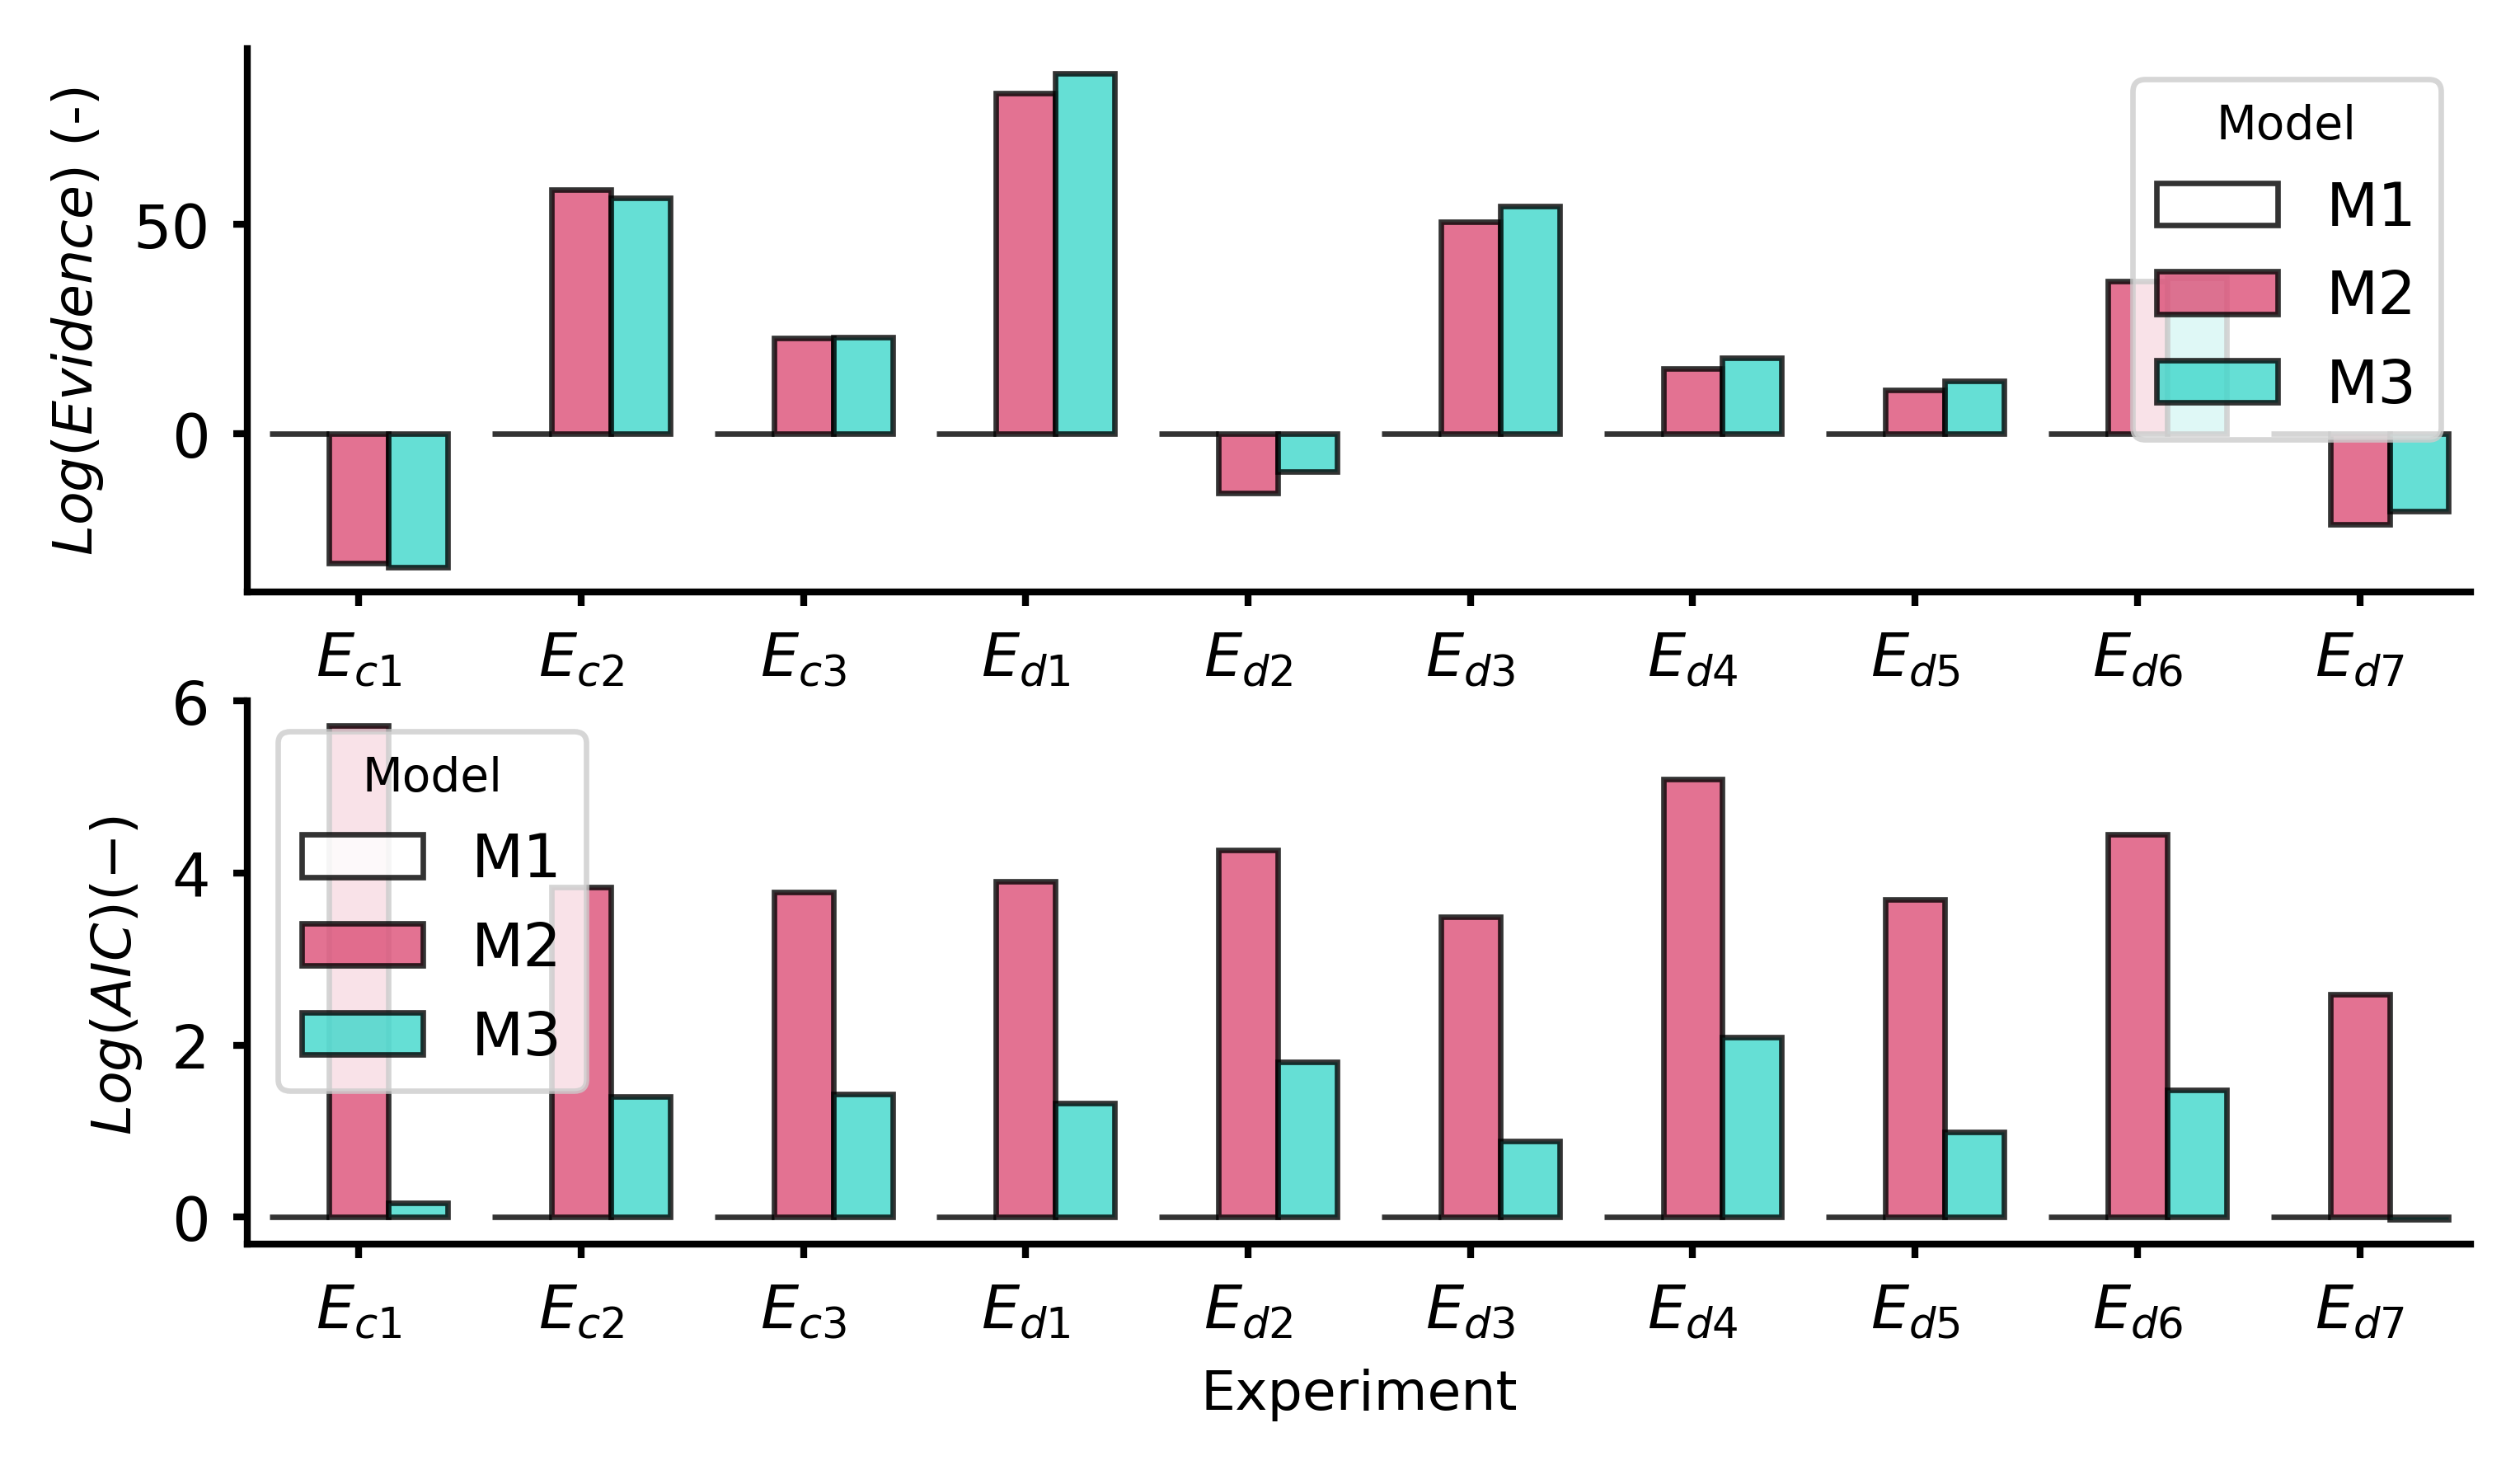

In [9]:
fig = plt.figure(figsize=(5.8, 3.2), dpi = 600)
sns.set_context("paper", rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":8,"axes.tickslabelssize":8,"text.usetex" : True,"text.latex.unicode" : True})  
#pal = dict(alpha1='#fff7f3', Vm1 = '#fde0dd',h1 = '#fcc5c0', Km1 = '#fa9fb5', d1 ='#f768a1' , alpha2 = '#dd3497', d2 ='#ae017e' ,Kf='#7a0177' )



gs = gridspec.GridSpec(2, 3)
#------> Barplot total model evidence
pal1 = dict(M1='#ffffff',M2 = '#f4376d',M3 = '#25f0e0')
#dict(S='#5e3c99', P = '#b2abd2',R = '#fdb863', O = '#fcbba1')#8dd3c7
#ffffb3

#------> Barplot total model evidence

ax1 = plt.subplot(gs[0, 0::])
ax1 = sns.barplot(data = lnEvidenceReorg,x='ExpName', y='LogEvidenceNorm', hue = 'Model',palette = pal1,edgecolor = 'black',errwidth = 0.8,alpha=.8)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(length=2)
ax1.set_xticklabels((r'$E_{c1}$',r'$E_{c2}$',r'$E_{c3}$',r'$E_{d1}$',r'$E_{d2}$',r'$E_{d3}$',r'$E_{d4}$',r'$E_{d5}$',r'$E_{d6}$',r'$E_{d7}$'))
ax1.set_xlabel('Experiment')
ax1.set_ylabel(r'$Log(Evidence)$ (-)',rotation = 90)

#------> Barplot total AIC
ax2 = plt.subplot(gs[1, 0::])

ax2 = sns.barplot(data = AICFrec,x='ExpName', y='normLogAIC', hue = 'Model',palette = pal1,edgecolor = 'black',errwidth = 0.8,alpha=.8)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.tick_params(length=2)
ax2.set_xticklabels((r'$E_{c1}$',r'$E_{c2}$',r'$E_{c3}$',r'$E_{d1}$',r'$E_{d2}$',r'$E_{d3}$',r'$E_{d4}$',r'$E_{d5}$',r'$E_{d6}$',r'$E_{d7}$'))
ax2.set_xlabel('Experiment')
ax2.set_ylabel(r'$Log(AIC)(-)$ ',rotation = 90)
# ax2.set_ylim([-0.25,2])
#plt.show()
fig.savefig('/Users/lucia/Dropbox/Processes_V2.0_Images/InkscapeImages/Evidence_size_OneLine.svg')